### Importing and Data

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9b1b1854157e4581aef7e43aac66aebf = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='FsYfCKzCQGra0kUVn7OIUOq6xJsMkGCvk6V3W9Mbs71H',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_9b1b1854157e4581aef7e43aac66aebf.get_object(Bucket='ibmdatasciencecapstoneproject-donotdelete-pr-y3fudu5mg18ep7',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.shape

(194673, 38)

There are 194673 rows and 38 column in the raw data. Because some columns are not useful, then we can drop some columns to simply the data.

In [4]:
tdf = df.drop(['INCKEY','COLDETKEY','OBJECTID','COLLISIONTYPE','REPORTNO','ADDRTYPE','INTKEY','LOCATION','SDOT_COLCODE','PEDROWNOTGRNT','INCDATE','JUNCTIONTYPE','SDOTCOLNUM','ST_COLDESC','SDOT_COLDESC','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','SEGLANEKEY','CROSSWALKKEY'],axis=1)
tdf.head()

,SEVERITYCODE,X,Y,STATUS,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Matched,Injury Collision,2,0,0,2,3/27/2013 2:54:00 PM,NaN,N,Overcast,Wet,Daylight,NaN,10,N
1,1,-122.347294,47.647172,Matched,Property Damage Only Collision,2,0,0,2,12/20/2006 6:55:00 PM,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,11,N
2,1,-122.334540,47.607871,Matched,Property Damage Only Collision,4,0,0,3,11/18/2004 10:20:00 AM,NaN,0,Overcast,Dry,Daylight,NaN,32,N
3,1,-122.334803,47.604803,Matched,Property Damage Only Collision,3,0,0,3,3/29/2013 9:26:00 AM,NaN,N,Clear,Dry,Daylight,NaN,23,N
4,2,-122.306426,47.545739,Matched,Injury Collision,2,0,0,2,1/28/2004 8:04:00 AM,NaN,0,Raining,Wet,Daylight,NaN,10,N


There are missing data in the some rows. Before handling those empty data, there are data using empty input as false input. Therefore, those false inputs need to be handled before dealing with the true missing data. 

Moreover, there are missing data as the form of space ' '. This mssing space input will be also treated as nan data and removed. 

After deleting the missing data, 184146 rows are left with 18 columns.

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


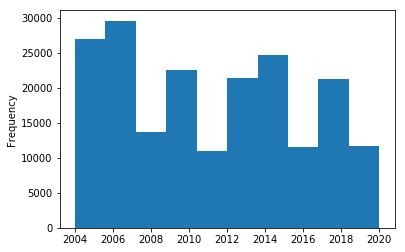

In [5]:
is_NaN = tdf.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = tdf[row_has_NaN]
rows_with_NaN['INCDTTM'] = pd.to_datetime(rows_with_NaN['INCDTTM'])
rows_with_NaN['INCDTTM'].dt.year.value_counts()
rows_with_NaN['INCDTTM'].dt.year.plot(kind='hist')

In [6]:
tdf['SPEEDING'] = tdf['SPEEDING'].fillna('N')
tdf['INATTENTIONIND'] = tdf['INATTENTIONIND'].fillna('N')
tdf = tdf.dropna()
tdf = tdf[~(tdf == ' ').any(axis=1)]
tdf['ST_COLCODE'] = tdf['ST_COLCODE'].astype(int)
tdf['INCDTTM'] = pd.to_datetime(tdf['INCDTTM'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [7]:
tdf.shape

(184146, 18)

In [8]:
tdf.head()

,SEVERITYCODE,X,Y,STATUS,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Matched,Injury Collision,2,0,0,2,2013-03-27 14:54:00,N,N,Overcast,Wet,Daylight,N,10,N
1,1,-122.347294,47.647172,Matched,Property Damage Only Collision,2,0,0,2,2006-12-20 18:55:00,N,0,Raining,Wet,Dark - Street Lights On,N,11,N
2,1,-122.334540,47.607871,Matched,Property Damage Only Collision,4,0,0,3,2004-11-18 10:20:00,N,0,Overcast,Dry,Daylight,N,32,N
3,1,-122.334803,47.604803,Matched,Property Damage Only Collision,3,0,0,3,2013-03-29 09:26:00,N,N,Clear,Dry,Daylight,N,23,N
4,2,-122.306426,47.545739,Matched,Injury Collision,2,0,0,2,2004-01-28 08:04:00,N,0,Raining,Wet,Daylight,N,10,N


### Basic Data Visualization
After cleaing the data, the first thing we would like to do is visualizing the data through simple technique. We can understand the data through this part.

In [9]:
import pandas as pd
import matplotlib as ml
import matplotlib.pyplot as plt

The column 'ST_COLCODE' is a code which is given by the type of collision. By counting the frequency of each number, we can see which type of accidents is the most common. The following histogram shows the distribution of the number. The second next cell count the number of first 6 type of collisions, 

32: One Parked - One Moving

10: Entering At Angle

14: From Same Direction - Both Going Straight - One Stopped - Rear End 

50: Struck Fixed Object

11: From Same Direction -Both Going Straight-Both Moving- Sideswipe 

28: From Opposite Direction - One Left Turn - One Straight 

Text(0.5, 0, 'Collsions tpye')

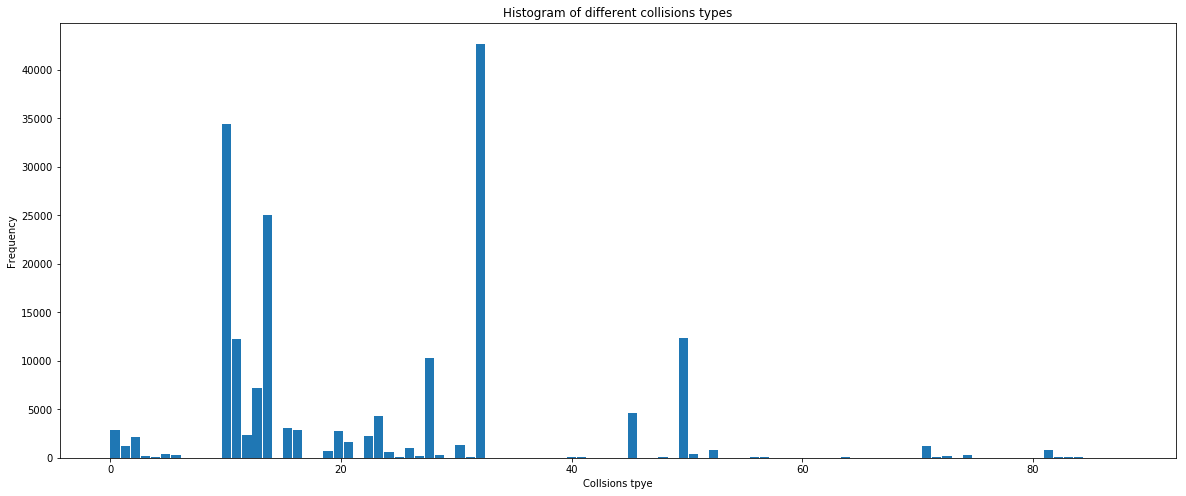

In [10]:
ax = tdf['ST_COLCODE'].plot(kind='hist', figsize=(20, 8), width=0.8, bins=100,title='Histogram of different collisions types')
ax.set_xlabel("Collsions tpye")

In [11]:
print('The counts of the first 6 most common type of collision')
tdf['ST_COLCODE'].value_counts().head(6)

The counts of the first 6 most common type of collision


32    42711
10    34407
14    25023
50    12386
11    12289
28    10257
Name: ST_COLCODE, dtype: int64

The histogram of number of person involved in the collision


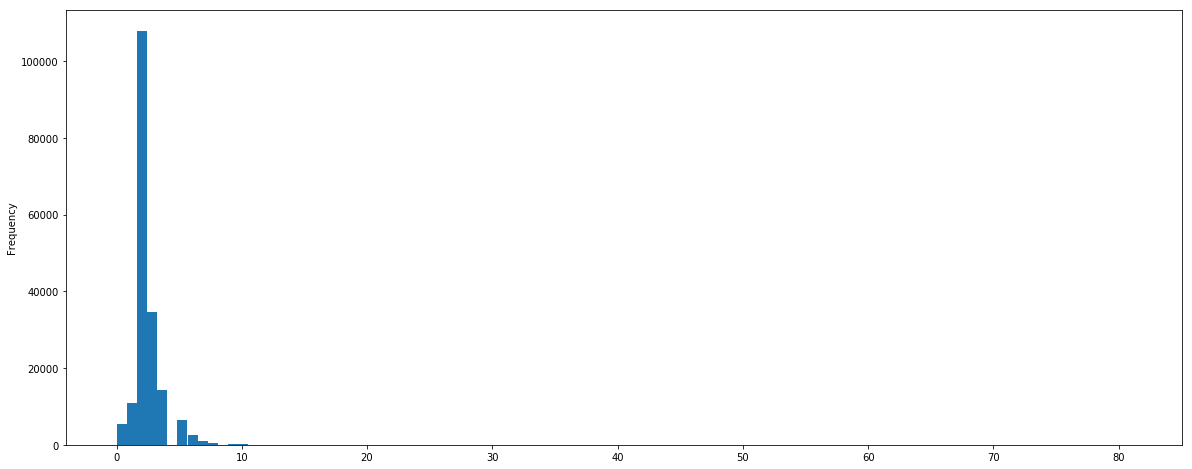

In [12]:
print('The histogram of number of person involved in the collision')
ax = tdf['PERSONCOUNT'].plot(kind='hist', figsize=(20, 8), width=0.8, bins=100)

In [13]:
tdf['SPEEDING'].value_counts()

N    175440
Y      8706
Name: SPEEDING, dtype: int64

In [14]:
tdf['INATTENTIONIND'].value_counts()

N    155049
Y     29097
Name: INATTENTIONIND, dtype: int64

In [15]:
tdf['UNDERINFL'].value_counts()

N    97224
0    78064
Y     4979
1     3879
Name: UNDERINFL, dtype: int64

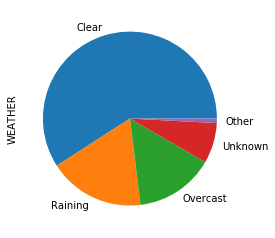

In [16]:
cdf = tdf.copy()
cdf['WEATHER'] = cdf['WEATHER'].replace({'Sleet/Hail/Freezing Rain','Snowing'}, {'Raining','Other'})
cdf['WEATHER'] = cdf['WEATHER'].replace({'Fog/Smog/Smoke'}, {'Other'})
cdf['WEATHER'] = cdf['WEATHER'].replace({'Blowing Sand/Dirt'}, {'Other'}) 
cdf['WEATHER'] = cdf['WEATHER'].replace({'Severe Crosswind'}, {'Other'}) 
cdf['WEATHER'] = cdf['WEATHER'].replace({'Partly Cloudy'}, {'Other'})                        
cdf.WEATHER.value_counts().plot(kind='pie')

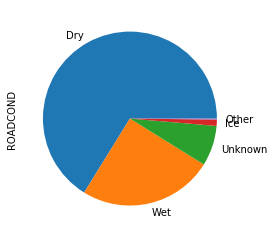

In [17]:
cdf['ROADCOND'] = cdf['ROADCOND'].replace({'Snow/Slush','Oil'}, {'Ice','Other'})
cdf['ROADCOND'] = cdf['ROADCOND'].replace({'Standing Water'}, {'Other'})
cdf['ROADCOND'] = cdf['ROADCOND'].replace({'Sand/Mud/Dirt'}, {'Other'})
cdf['ROADCOND'].value_counts().plot(kind='pie')

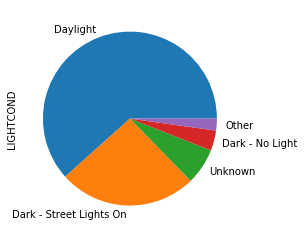

In [18]:
cdf['LIGHTCOND'] = cdf['LIGHTCOND'].replace({'Dusk','Dark - No Street Lights'}, {'Other','Dark - No Light'})
cdf['LIGHTCOND'] = cdf['LIGHTCOND'].replace({'Dawn','Dark - Street Lights Off'}, {'Other','Dark - No Light'})
cdf['LIGHTCOND'] = cdf['LIGHTCOND'].replace({'Dark - Unknown Lighting'}, {'Other'})
cdf['LIGHTCOND'].value_counts().plot(kind='pie')

Below is the visualiztion of the collision distribution of different years and months. From the histogram of collision in years 2004 to 2020, the downwards trend can be seen. Because 2004 is the first year of record and 2020 is only counted half year, we may exclude them form the data. Then the downward trend become more obvious. 

On the other hand, we can see that the monthly distribution of collisions is almost constant, which is an evidence that collisions are independent of the month.

In [19]:
tdf['INCDTTM'].dt.year.value_counts()

2006    14809
2005    14760
2007    14030
2008    13164
2015    12170
2004    11568
2009    11312
2014    11185
2011    10602
2016    10576
2010    10530
2017    10151
2012    10007
2013     9748
2018     9664
2019     8627
2020     1243
Name: INCDTTM, dtype: int64

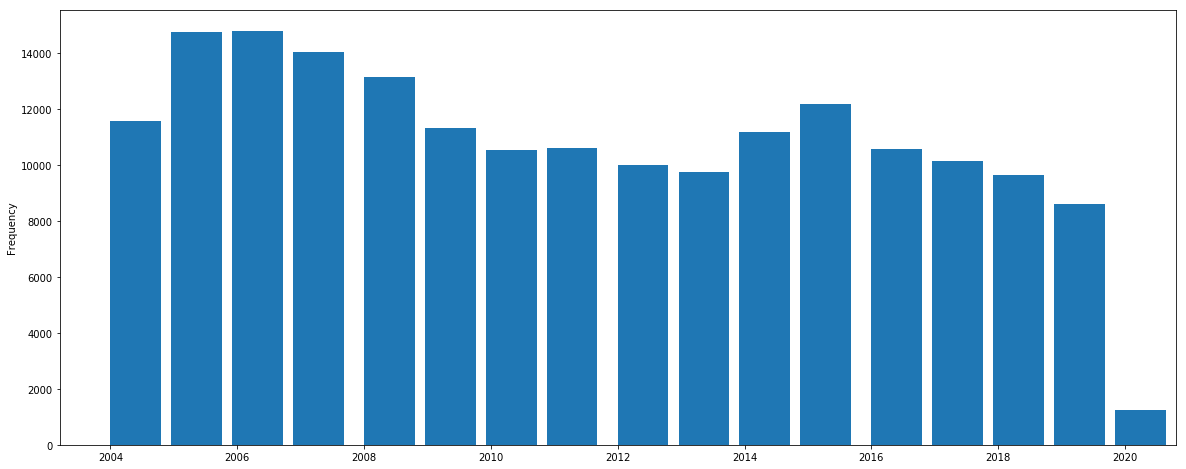

In [20]:
tdf['INCDTTM'].dt.year.plot(kind='hist', figsize=(20, 8), width=0.8, bins=100)

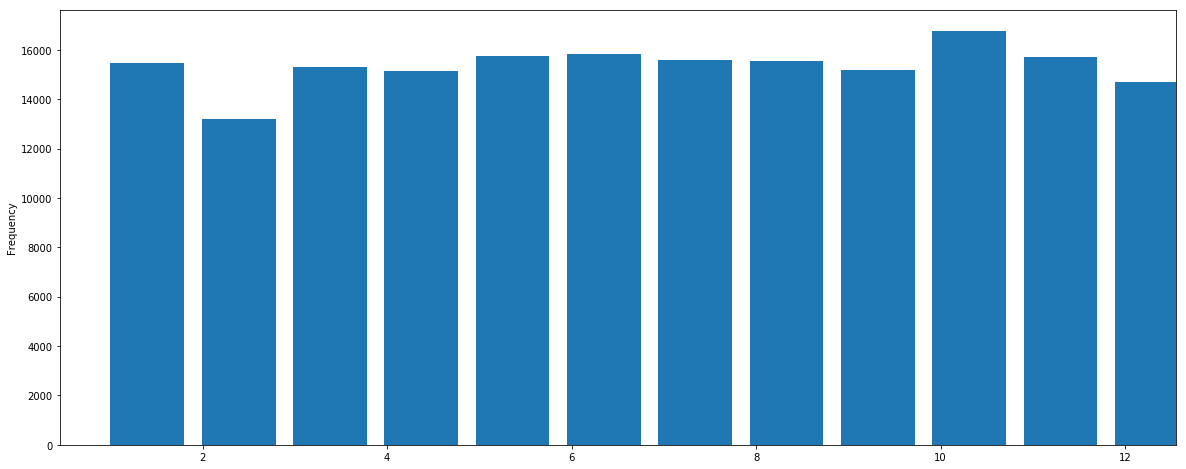

In [21]:
tdf['INCDTTM'].dt.month.plot(kind='hist', figsize=(20, 8), width=0.8, bins=100)

In [22]:
tdf['SEVERITYDESC'].value_counts()

Property Damage Only Collision    128146
Injury Collision                   56000
Name: SEVERITYDESC, dtype: int64

The final count shows that injury clooisions were only small portion of the total collisions, while other collision only involves damaged property.

We can give some conditions to filter out the desired data. For example, we can select collisions involved speeding and collision with parked car. Then we can visualize those data through scatter plot. The plot roughly shows the location of the selected collisions, thus we can see the density of the collisions.

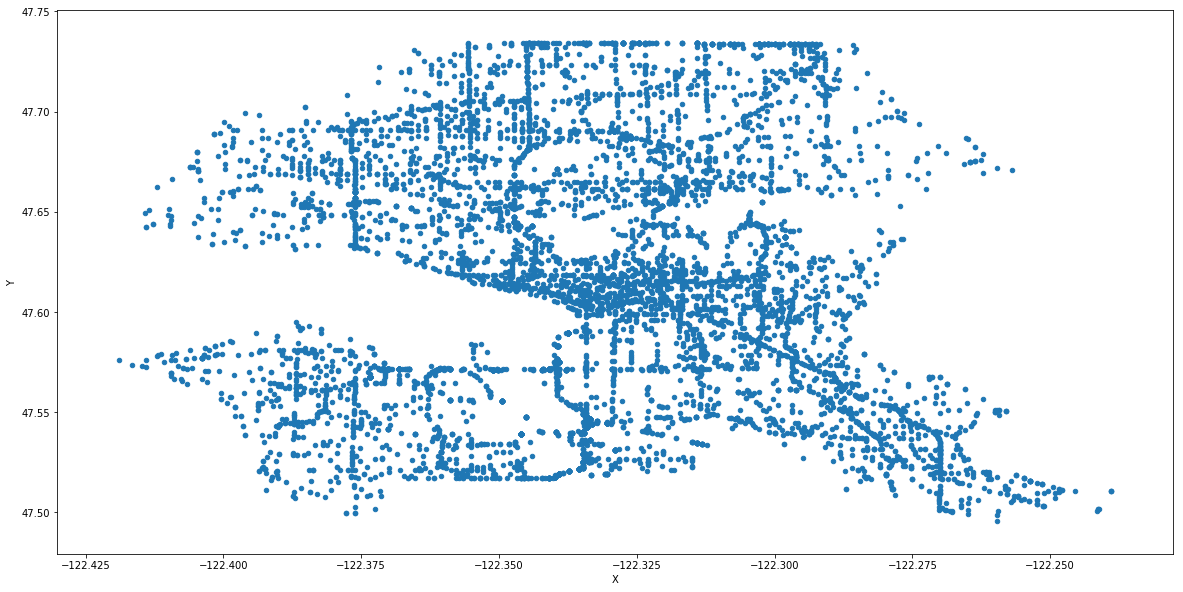

In [23]:
con1 = tdf['SPEEDING'] == 'Y'
con2 = tdf['ST_COLCODE'] == 32
hdf = tdf[con1]
#hdf.head()
hdf.plot(kind='scatter', x='X', y='Y',figsize=(20,10))


### Machine Learning Model

In the following code, the relations between data are studied by the use of machine learning methods. Relations and predictive model can be built through the regressions, clustering, correlation methods.

In [24]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline
locations = hdf[['X', 'Y']]
locationlist = locations.values.tolist()
epsilon = 0.005
minimumSamples = 10
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(locationlist)
labels = db.labels_
labels

array([ 0,  0, -1, ...,  0,  0,  0])

In [25]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True, False, ...,  True,  True,  True])

In [26]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

14

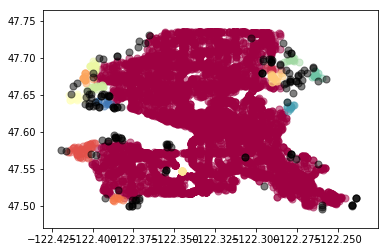

In [27]:
unique_labels = set(labels)
unique_labels
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

#class_member_mask = (labels == 0)

#xy = np.array(locationlist)[class_member_mask & core_samples_mask]
#plt.scatter(xy[:, 0], xy[:, 1], color='C0', s=50, marker=u'o', alpha=0.5)

for k, col in zip(unique_labels, colors):
    if k == -1:
      # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

#    # Plot the datapoints that are clustered
    xy = np.array(locationlist)[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    #Plot the outliers
    xy = np.array(locationlist)[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

In [46]:

X = tdf['INCDTTM'].dt.year.value_counts(sort=False).tolist()[1:-1]
y = tdf['INCDTTM'].dt.year.value_counts(sort=False).index.tolist()[1:-1]
print (y, X)

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019] [14760, 14809, 14030, 13164, 11312, 10530, 10602, 10007, 9748, 11185, 12170, 10576, 10151, 9664, 8627]


0.5376731249153505


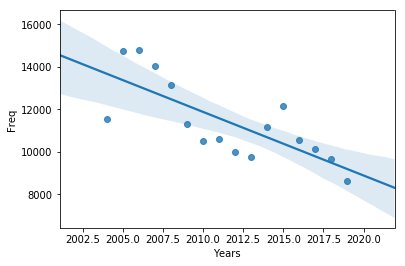

In [48]:
import seaborn as sns
from sklearn.linear_model import LinearRegression



X = tdf['INCDTTM'].dt.year.value_counts(sort=True).tolist()[1:-1]
y = tdf['INCDTTM'].dt.year.value_counts(sort=True).index.tolist()[1:-1]
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))

ccc = tdf['INCDTTM'].dt.year.value_counts().to_frame(name='Freq')
ccc['Years'] = ccc.index
ccc = ccc.iloc[:16]
sns.regplot(x='Years', y="Freq", data=ccc)

In [28]:
X = ccc[['Years']]
Y = ccc['Freq']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.5772682980903474

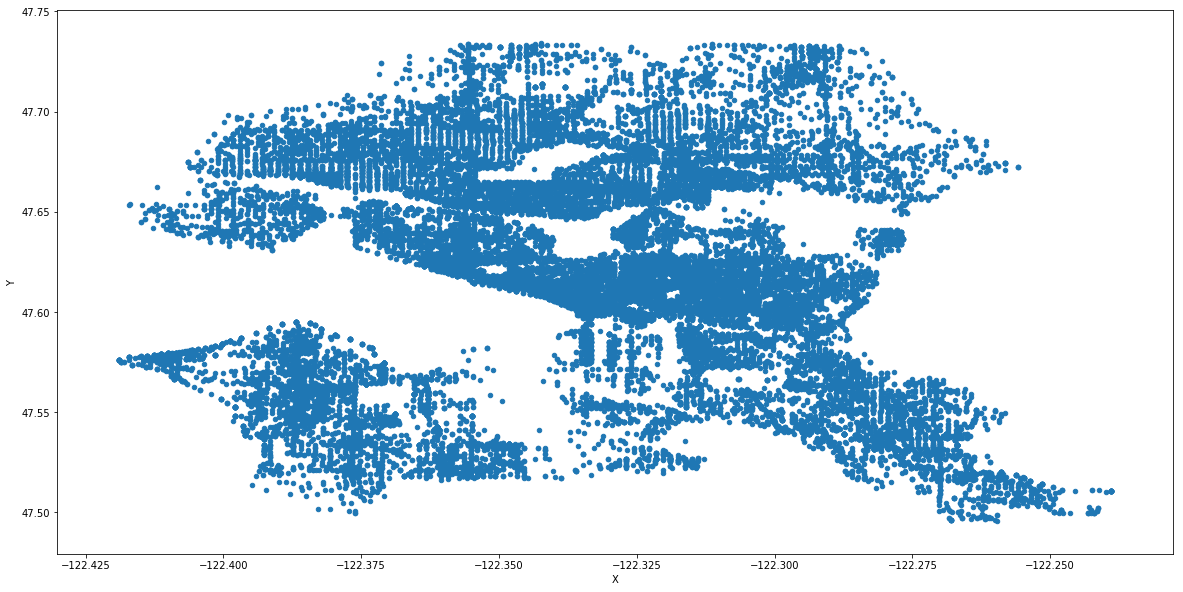

In [29]:
speeding = tdf['ST_COLCODE'] == 32
time = tdf['INCDTTM'].dt.year != 2020
hdf = tdf[time & speeding]
hdf.plot(kind='scatter', x='X', y='Y',figsize=(20,10))

With the locations of previous collisions, it is possible to remind the driver if their location is detected on the dangous road. The dangerous roads can be defined if numbers of collisions happened near the car location before. Using the concept of k-means and clustering, if the inputed location have certain number of collsions happened within a radius, the output will show that is dangerous road and warn the driver. 

In [104]:
from termcolor import colored
print('Your lattitude should be within the location of Seattle ')#(',tdf['X'].min(),'<x<',tdf['X'].max(),',',tdf['Y'].min(),'<y<',tdf['Y'].max(),')')
x_locate = float(input('What is your latitude:',))
y_locate = float(input('What is your longitude:',))

while x_locate <tdf['X'].min() or x_locate >tdf['X'].max() or y_locate <tdf['Y'].min() or y_locate >tdf['Y'].max():
    print('Input is out of range. Please input a correct location.')
    x_locate = float(input('What is your latitude:',))
    y_locate = float(input('What is your longitude:',))

check = (tdf['X']-x_locate)*(tdf['X']-x_locate)+(tdf['Y']-y_locate)*(tdf['Y']-y_locate) <0.0005
no = tdf[check].shape[0]
try:
    case = tdf[check]['ST_COLCODE'].value_counts().index[0]
except:
    case = 'none'
print('Total number of neatby collisions:', no)
if no <30:
    print('Dangerous level is', colored('LOW', 'green'), 'and the most common collsions are type:',case)
else:
    print('Dangerous level is', colored('HIGH', 'red'), 'and the most common collsions are type:',case)

Your lattitude should be within the location of Seattle 
What is your latitude:-122.25
What is your longitude:47.6
Total number of neatby collisions: 0
Dangerous level is LOW and the most common collsions are type: none


The following code use the Dynamic Density Based Clustering method to cluster the dense data points to group. One can set the radius of circle to define neighthood and the require number of collisions. The output will show the very dense collisions locations in the past, which indicate those locations are dangerous and driver need to put extra care when they are on those roads. One point from each group are selected to represent the group and are showed on the map at Seattle.

number of groups:  157


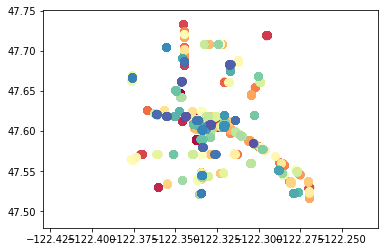

In [31]:
%matplotlib inline
locations = tdf[['X', 'Y']]
locationlist = locations.values.tolist()
epsilon = 0.0005
minimumSamples = 100
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(locationlist)
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('number of groups: ',n_clusters_)
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

#class_member_mask = (labels == 0)

#xy = np.array(locationlist)[class_member_mask & core_samples_mask]
#plt.scatter(xy[:, 0], xy[:, 1], color='C0', s=50, marker=u'o', alpha=0.5)

for k, col in zip(unique_labels, colors):
    if k == -1:
      # Black used for noise.
        col = 'k'
        al=0
    else:
        al=0.5

    class_member_mask = (labels == k)

#    # Plot the datapoints that are clustered
    xy = np.array(locationlist)[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=al)

    #Plot the outliers
    xy = np.array(locationlist)[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=al)

In [32]:
tdf['GeoGroup'] = labels.tolist()
c = tdf.drop_duplicates(subset = ['GeoGroup'])
cc = c[['X','Y','GeoGroup']]
cc.shape

(158, 3)

In [33]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                       

In [83]:
locations = cc[['Y', 'X']]
locationlist = locations.values.tolist()
map = folium.Map(location=[47.6, -122.325], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)
map

### Logistic regression
Using the data, we may use the conditions of the collision to predict the seriesness of the collision. For a given light, weather and road condition, it is pssible to predict the probability of the collision would involve injury using the method of logistic regression. First, the data have to be transformed into numeric data to deleting the unknown for unbias prediction. Then using the logistic training, we can get the model from the data.

In [62]:
ldf = tdf[['SEVERITYCODE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]
ldf['UNDERINFL'] = ldf['UNDERINFL'].replace({'N','Y'}, {0,1})
ldf['SPEEDING'] = ldf['SPEEDING'].replace({'N','Y'}, {0,1})
ldf['LIGHTCOND'] = ldf['LIGHTCOND'].replace({'Daylight','Dusk','Dawn','Dark - Street Lights On','Dark - No Street Lights','Dark - Street Lights Off'}, {0,1,2,3,4,5})
ldf['WEATHER'] = ldf['WEATHER'].replace({'Clear','Raining','Sleet/Hail/Freezing Rain','Snowing','Fog/Smog/Smoke','Overcast','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'}, {0,1,2,3,4,5,6,7,8})
ldf['ROADCOND'] = ldf['ROADCOND'].replace({'Dry','Wet','Ice','Snow/Slush','Standing Water','Sand/Mud/Dirt','Oil'}, {0,1,2,3,4,5,6})
ldf = ldf[ldf.LIGHTCOND != 'Unknown']
ldf = ldf[ldf.LIGHTCOND != 'Other']
ldf = ldf[ldf.LIGHTCOND != 'Dark - Unknown Lighting']
ldf = ldf[ldf.ROADCOND != 'Unknown']
ldf = ldf[ldf.ROADCOND != 'Other']
ldf = ldf[ldf.WEATHER != 'Unknown']
ldf = ldf[ldf.WEATHER != 'Other']
ldf["LIGHTCOND"] = ldf.LIGHTCOND.astype(float)
ldf["UNDERINFL"] = ldf.UNDERINFL.astype(float)
ldf["WEATHER"] = ldf.WEATHER.astype(float)
ldf["ROADCOND"] = ldf.ROADCOND.astype(float)
ldf.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,0.0,7.0,0.0,4.0,0
1,1,0.0,5.0,0.0,0.0,0
2,1,0.0,7.0,2.0,4.0,0
3,1,0.0,0.0,2.0,4.0,0
4,2,0.0,5.0,0.0,4.0,0


In [36]:
X = np.asarray(ldf[['UNDERINFL', 'WEATHER', 'LIGHTCOND', 'SPEEDING']])
y = np.asarray(ldf['SEVERITYCODE'])
y [0:5]

array([2, 1, 1, 1, 2])

In [67]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.23564612,  1.70228025,  0.68032794, -0.23209724],
       [-0.23564612,  1.00878108, -1.53665578, -0.23209724],
       [-0.23564612,  1.70228025,  0.68032794, -0.23209724],
       [-0.23564612, -0.72496686,  0.68032794, -0.23209724],
       [-0.23564612,  1.00878108,  0.68032794, -0.23209724]])

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (132953, 4) (132953,)
Test set: (33239, 4) (33239,)


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.66366523, 0.33633477],
       [0.66243047, 0.33756953],
       [0.66674233, 0.33325767],
       ...,
       [0.66674233, 0.33325767],
       [0.66674233, 0.33325767],
       [0.66366523, 0.33633477]])

In [71]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6717109419657631

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[22327     0]
 [    0     0]]


In [43]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80     22327
           2       0.00      0.00      0.00     10912

   micro avg       0.67      0.67      0.67     33239
   macro avg       0.34      0.50      0.40     33239
weighted avg       0.45      0.67      0.54     33239



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


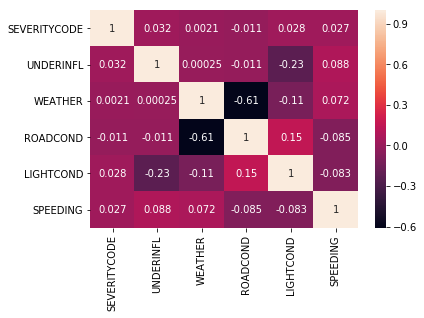

In [65]:
corrMatrix = ldf.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()